# Assignment 1: How much does your car cost?

## Data

The retail price of 2005 General Motors cars can be found in `car_data.csv`.

**Data Descriptions**:

||Features|Descriptions
|-|-|-|
|1| Price   | suggested retail price of the used 2005 GM car in excellent condition|
|2| Mileage | number of miles the car has been driven|
|3| Make    | manufacturer of the car such as Saturn, Pontiac, and Chevrolet|
|4| Model   | specific models for each car manufacturer such as Ion, Vibe, Cavalier|
|5| Trim (of car)| specific type of car model such as SE Sedan 4D, Quad Coupe 2D |         
|6| Type    | body type such as sedan, coupe, etc |
|7| Cylinder| number of cylinders in the engine    |    
|8| Liter   | a more specific measure of engine size|     
|9| Doors   | number of doors           |
|10| Cruise | indicator variable representing whether the car has cruise control (1 = cruise)|
|11| Sound  | indicator variable representing whether the car has upgraded speakers (1 = upgraded)|
|12| Leather| indicator variable representing whether the car has leather seats (1 = leather)|

#### 1 Import necessary libraries

In [1]:
# Libraries to load data
import pandas as pd
import numpy as np
# Libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
# Libraries to create and evaluate models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### 2. Load the data from csv file to `pandas` dataframe

In [2]:
df = pd.read_csv('car_data.csv')

#### 3. Inspect the first 5 rows of the dataframe

In [3]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### 4. Check the number of rows and columns

In [4]:
df.shape

(804, 12)

#### 5. Get some information about the dataset via `.info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


#### 6. Check number of missing values per columns

In [6]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

#### 7. Get table of distributions each features and visualize this distribution.

In [7]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


#### 8. Visualize correlation coefficient between features and label.

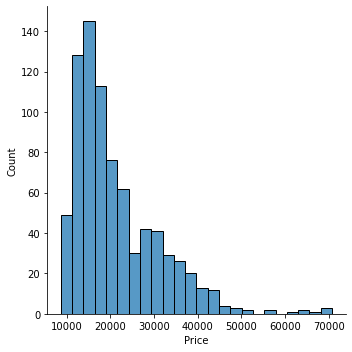

In [8]:
sns.displot(data=df['Price'])

<AxesSubplot:>

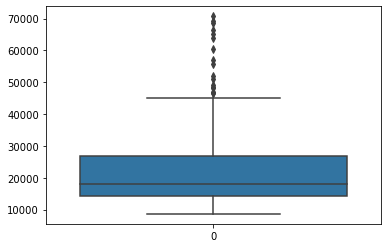

In [10]:
sns.boxplot(data=df['Price'])

<AxesSubplot:>

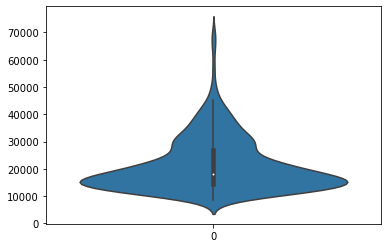

In [11]:
sns.violinplot(data=df['Price'])

<AxesSubplot:>

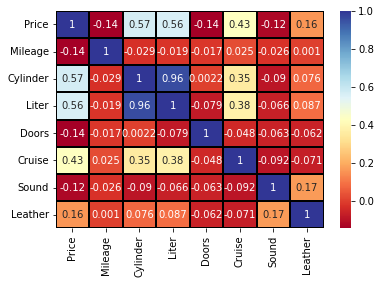

In [14]:
sns.heatmap(df.corr(), annot=True, linewidths=0.01, linecolor='black', cmap='RdYlBu')

#### 9. Split the dataset into train and test set with ratio 90:10 with random seeds of 42.

In [31]:
scaled_data = pd.get_dummies(df)
scaled_data

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data.drop('Price', axis=1), scaled_data['Price'], test_size=0.2, random_state=42)

In [33]:
x_train.shape, y_train.shape

((643, 97), (643,))

In [45]:
x_train.head(5)

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,Make_Chevrolet,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
344,20000,8,6.0,2,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
350,7054,8,6.0,2,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
443,15903,6,3.5,4,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
331,6709,4,2.2,4,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
290,13776,4,2.2,2,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [35]:
x_test.shape, y_test.shape

((161, 97), (161,))

In [50]:
x_test[:5].Mileage

192    14627
717    21960
168    27906
522    11204
536    20917
Name: Mileage, dtype: int64

#### 10. Find the best combination of factors to predict price with linear regression classifier.

E.g:
- Use mileage to find the linear regression equation.
- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### 11. Evaluate your model performance using R-squared Error.

In [37]:
y_pred = model.predict(x_test)

In [38]:
mean_absolute_error(y_test, y_pred)

626.6177875754353

In [39]:
mean_squared_error(y_test, y_pred)

681752.3171922197

In [40]:
r2_score(y_test, y_pred)

0.9914044828588732

#### 12. Visualize the actual prices and predicted prices of the test set.

In [41]:
pd.DataFrame({'prediction': y_pred,
             'groundtruth': y_test})

,prediction,groundtruth
192,11916.981649,11302.902985
717,29400.696425,29114.544506
168,9448.992001,10777.052537
522,20884.869729,20677.593819
536,14968.374965,15253.868566
...,...,...
658,30339.504337,29142.714386
356,35592.730281,35575.417049
525,18660.300239,18042.221074
748,15449.810660,14881.955446


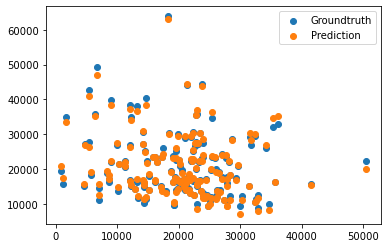

In [51]:
plt.scatter(x_test[:].Mileage, y_test, label='Groundtruth')
plt.scatter(x_test[:].Mileage, y_pred, label='Prediction')
plt.legend()
plt.show()